In [223]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
import importlib
import utils
import simulatedannealing
from main_cd import main_cd as main
importlib.reload(utils)
importlib.reload(simulatedannealing)
from utils import *


CLUSTER RESULTS - 28.09.2023

In [359]:
import pickle

# surrogate optimization and simulated annealing
with open('../surdata/Sur_tree34_iter-20_objective-meanopt10-31-2023_23:11.pkl', 'rb') as file: 
    # Load the object from the file
    sur_loaded_data = pickle.load(file)
sur_loaded_data

[[<utils.Surrogate at 0x2d36a5670>,
 231.4167746782303,

In [360]:
sur_results = pd.DataFrame([np.mean(sur_loaded_data[0][i].y, axis=1)[10:] for i in range(10)]).T

In [361]:
def reduce_to_means_per_iteration(sur_df, group_size):
    sur_df['Iteration'] = [i for i in range(group_size) for _ in range(len(sur_df)//group_size)]
    return pd.DataFrame(sur_df.groupby('Iteration').mean().to_numpy())  

In [362]:
sur_results20 = reduce_to_means_per_iteration(sur_results,20)

In [363]:
sur_df = pd.melt(sur_results20, var_name='Iteration', value_name='Surrogate', ignore_index=False).reset_index()

In [364]:
import pickle

# surrogate optimization and simulated annealing
with open('../surdata/Ax_tree34_iter-20_objective-meanopt10-31-2023_21:31.pkl', 'rb') as file: 
    # Load the object from the file
    ax_loaded_data = pickle.load(file)
ax_loaded_data

[[AxClient(experiment=Experiment(simulation_test_experiment)),
  AxClient(experiment=Experiment(simulation_test_experiment)),
  AxClient(experiment=Experiment(simulation_test_experiment)),
  AxClient(experiment=Experiment(simulation_test_experiment)),
  AxClient(experiment=Experiment(simulation_test_experiment)),
  AxClient(experiment=Experiment(simulation_test_experiment)),
  AxClient(experiment=Experiment(simulation_test_experiment)),
  AxClient(experiment=Experiment(simulation_test_experiment)),
  AxClient(experiment=Experiment(simulation_test_experiment)),
  AxClient(experiment=Experiment(simulation_test_experiment))],
 190.87201750278473,
 {'A': array([[0., 1., 0., ..., 0., 0., 0.],
         [1., 0., 1., ..., 0., 0., 0.],
         [0., 1., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  'protocol': 'srs',
  'p_gen': 0.9,
  'p_swap': 1,
  'return_data': 'avg',
  'progress

In [386]:
ax_results = pd.DataFrame([np.array(ax_loaded_data[0][i].get_trials_data_frame()['mean']) for i in range(10)]).T
ax_df = pd.melt(ax_results, var_name='Iteration', value_name='Ax', ignore_index=False).reset_index()

In [387]:
ax_df

,index,Iteration,Ax
0,0,0,2.172222
1,1,0,2.394444
2,2,0,2.266667
3,3,0,2.305556
4,4,0,2.791667
...,...,...,...
195,15,9,3.480556
196,16,9,3.397222
197,17,9,3.450000
198,18,9,3.300000


In [366]:
sur_df.merge(ax_df)

,index,Iteration,Surrogate,Ax
0,0,0,2.397778,2.172222
1,1,0,2.382778,2.394444
2,2,0,2.375000,2.266667
3,3,0,2.423333,2.305556
4,4,0,2.333333,2.791667
...,...,...,...,...
195,15,9,3.265833,3.480556
196,16,9,3.278056,3.397222
197,17,9,3.293611,3.450000
198,18,9,3.327500,3.300000


In [375]:
# surrogate optimization and simulated annealing
with open('../surdata/SA_tree34_iter-20_objective-meanopt11-01-2023_03:58.pkl', 'rb') as file: 
    # Load the object from the file
    sa_loaded_data = pickle.load(file)

,M,qbits_per_channel,cutoff,q_swap,p_cons,objective
0,7,29,2.650913,0.779691,0.123402,2.200000
1,3,8,9.637078,0.980856,0.064386,3.155556
2,1,6,9.918945,0.468735,0.142039,1.944444
3,8,11,5.500632,0.357008,0.175997,2.355556
4,7,46,4.017927,0.844855,0.034388,2.811111
5,4,12,7.050057,0.384178,0.068127,2.672222
6,7,42,3.770193,0.914027,0.121181,2.455556
7,1,7,6.974866,0.204184,0.186855,1.950000
8,5,30,3.755459,0.255176,0.084544,2.166667
9,2,17,5.658566,0.764642,0.023044,2.816667


In [419]:
sa_results = pd.DataFrame([np.array(sa_loaded_data[0][i].objective[:20]) for i in range(10)]).T
sa_df = pd.melt(sa_results, var_name='Iteration', value_name='SA', ignore_index=False).reset_index()

In [420]:
sa_results

,0,1,2,3,4,5,6,7,8,9
0,2.200000,2.188889,2.161111,2.233333,2.105556,2.144444,2.122222,2.211111,2.238889,2.150000
1,3.155556,2.505556,2.416667,1.861111,1.938889,2.766667,2.250000,0.822222,2.566667,0.950000
2,1.944444,2.433333,2.116667,2.483333,2.144444,2.416667,2.772222,2.111111,2.550000,3.066667
3,2.355556,1.933333,1.900000,2.733333,2.972222,1.805556,2.511111,1.950000,2.211111,1.916667
4,2.811111,2.772222,2.522222,2.055556,2.533333,3.072222,2.700000,1.927778,2.277778,3.166667
5,2.672222,2.716667,2.227778,2.383333,2.772222,1.322222,2.361111,1.911111,2.711111,2.211111
6,2.455556,1.927778,2.738889,3.261111,2.455556,2.355556,2.405556,2.166667,2.238889,2.494444
7,1.950000,1.794444,3.288889,2.744444,2.322222,2.472222,2.661111,2.922222,3.233333,2.633333
8,2.166667,1.583333,1.950000,2.188889,1.922222,2.788889,3.088889,2.833333,2.533333,2.150000
9,2.816667,2.294444,2.138889,2.000000,2.477778,2.022222,1.850000,2.777778,2.477778,2.916667


In [427]:
df_plot = pd.concat([sur_df, ax_df, sa_df], axis=1).T.drop_duplicates().T.melt(id_vars=['index', 'Iteration'], value_name='result')

In [428]:
df_plot

,index,Iteration,variable,result
0,0.0,0.0,Surrogate,2.397778
1,1.0,0.0,Surrogate,2.382778
2,2.0,0.0,Surrogate,2.375000
3,3.0,0.0,Surrogate,2.423333
4,4.0,0.0,Surrogate,2.333333
...,...,...,...,...
595,15.0,9.0,SA,2.266667
596,16.0,9.0,SA,3.338889
597,17.0,9.0,SA,3.038889
598,18.0,9.0,SA,2.188889


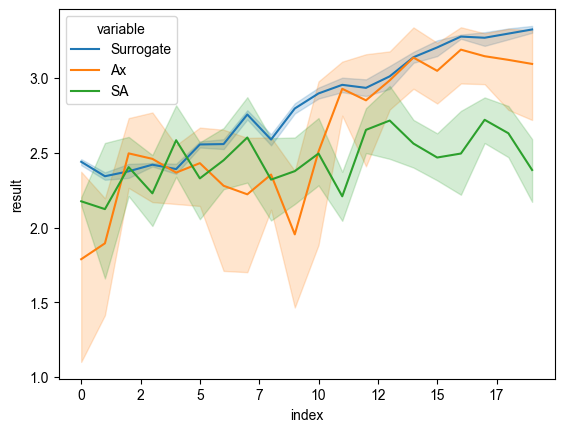

In [429]:
from  matplotlib.ticker import FuncFormatter
sns.lineplot(data = df_plot, x='index', y='result', hue='variable')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

In [149]:
# bandit optimization
with open('../surdata/Ax_tree23_iter-2_objective-meanopt10-31-2023_18:13.pkl', 'rb') as file: 
    # Load the object from the file
    ax_data = pickle.load(file)

In [164]:
ax_data[0][0]

(0,
 {'M': 0,
  'qbits_per_channel': 47,
  'cutoff': 8.64177656173706,
  'q_swap': 0.6341571807861328,
  'p_cons': 0.026782657653093338},
 ({'mean': 0.0}, {'mean': {'mean': 0.0}}))

In [116]:
np.mean(model.y[-1])

3.0793650793650795

In [117]:
-ySA[-1]

3.216422466422466

In [118]:
ax_data

[AxClient(experiment=Experiment(simulation_test_experiment)),
 342.70709919929504,
 {'A': array([[0., 1., 0., 0., 1., 0., 0.],
         [1., 0., 1., 1., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 1., 1.],
         [0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0.]]),
  'protocol': 'srs',
  'p_gen': 0.9,
  'p_swap': 1,
  'return_data': 'avg',
  'progress_bar': None,
  'total_time': 300,
  'N_samples': 10}]

In [119]:
ax_experiment = ax_data[0]
ax_experiment.get_trials_data_frame().iloc[-1]

trial_index                109
arm_name                 109_0
trial_status         COMPLETED
generation_method         GPEI
mean                  2.793651
M                            7
qbits_per_channel           35
cutoff                    10.0
q_swap                0.535906
p_cons                0.074549
Name: 109, dtype: object

Ax

In [120]:
ax_data

[AxClient(experiment=Experiment(simulation_test_experiment)),
 342.70709919929504,
 {'A': array([[0., 1., 0., 0., 1., 0., 0.],
         [1., 0., 1., 1., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 1., 1.],
         [0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0.]]),
  'protocol': 'srs',
  'p_gen': 0.9,
  'p_swap': 1,
  'return_data': 'avg',
  'progress_bar': None,
  'total_time': 300,
  'N_samples': 10}]

In [121]:
ax_experiment = ax_data[0]


In [122]:
ax_experiment

AxClient(experiment=Experiment(simulation_test_experiment))

In [123]:
df_ax_results = ax_experiment.get_trials_data_frame().iloc[:, 4:11]
df_ax_results['node_mean'] = df_ax_results.apply(np.mean, axis=1)

In [124]:
ax_experiment.get_trials_data_frame()['mean']

0      2.222222
1      2.158730
2      2.634921
3      1.111111
4      2.412698
         ...   
105    2.761905
106    2.761905
107    0.984127
108    2.634921
109    2.793651
Name: mean, Length: 110, dtype: float64

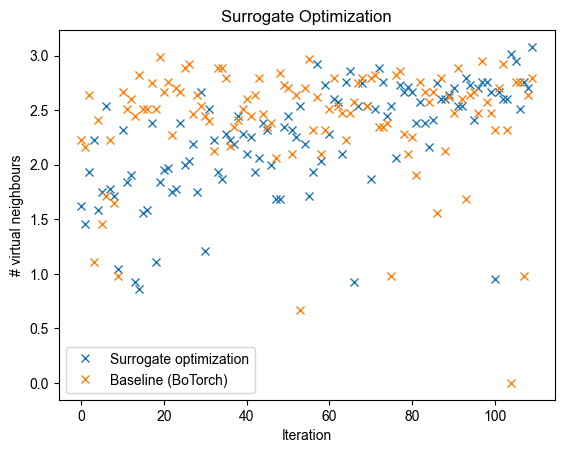

In [125]:
#fig = plt.figure(figsize=(20,10))
plt.title('Surrogate Optimization')
plt.plot([np.mean(y_i) for y_i in np.array(model.y)], 'x', label='Surrogate optimization')
#plt.plot([np.mean(y_i) for y_i in np.array(ySA)*-1], 'x', label='Baseline (simulated annealing)')
plt.plot(ax_experiment.get_trials_data_frame()['mean'], 'x', label='Baseline (BoTorch)')
#plt.plot([np.mean(np.array(y_i)) for y_i in refmodel.y],'x', label='Random evaluations')
plt.ylabel('# virtual neighbours')
plt.xlabel('Iteration')
plt.legend()

In [28]:
ax_experiment.get()

,trial_index,arm_name,trial_status,generation_method,mean,M,qbits_per_channel,cutoff,q_swap,p_cons
0,0,0_0,COMPLETED,Sobol,2.448118,5,3,6.957043,0.972659,0.107974
1,1,1_0,COMPLETED,Sobol,2.191001,5,50,3.687072,0.195957,0.056803
2,2,2_0,COMPLETED,Sobol,2.743802,4,37,6.783028,0.827821,0.194770
3,3,3_0,COMPLETED,Sobol,1.836547,2,22,1.234270,0.494645,0.163173
4,4,4_0,COMPLETED,Sobol,3.340680,8,29,9.946476,0.879804,0.069523
...,...,...,...,...,...,...,...,...,...,...
115,115,115_0,COMPLETED,GPEI,3.543618,9,43,9.842401,1.000000,0.028671
116,116,116_0,COMPLETED,GPEI,3.017447,6,21,6.879380,0.783876,0.065972
117,117,117_0,COMPLETED,GPEI,3.264463,8,33,8.767982,0.840266,0.055270
118,118,118_0,COMPLETED,GPEI,3.426997,6,37,10.000000,1.000000,0.074457


In [30]:
ax_experiment.get_best_trial()

/opt/homebrew/Caskroom/miniforge/base/envs/qnetsur/lib/python3.9/site-packages/ax/utils/stats/model_fit_stats.py:132: RuntimeWarning: divide by zero encountered in divide
  return float(np.mean(1.96 * 2 * se_pred / np.abs(y_obs)))
/opt/homebrew/Caskroom/miniforge/base/envs/qnetsur/lib/python3.9/site-packages/ax/utils/stats/model_fit_stats.py:143: RuntimeWarning: divide by zero encountered in divide
  return float(np.mean(np.abs((y_pred - y_obs) / y_obs)))
/opt/homebrew/Caskroom/miniforge/base/envs/qnetsur/lib/python3.9/site-packages/ax/utils/stats/model_fit_stats.py:150: RuntimeWarning: divide by zero encountered in scalar divide
  return float((np.max(y_obs) - min_y_obs) / min_y_obs)


(119,
 {'M': 8,
  'qbits_per_channel': 39,
  'cutoff': 8.818591914672425,
  'q_swap': 1.0,
  'p_cons': 0.01},
 ({'mean': 3.455816937480411}, {'mean': {'mean': 0.027636438499553682}}))

SURROGATE TEST

In [255]:
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

a = -5
b = 5
n=100

res = []

dim = 5
fun = lambda row: -sum([row[i]**2 for i in range(dim)])

def get_neighbour(row,count): 
    f = (1-np.log(1+count/n))**4
    return np.array([np.random.normal(row[i], scale=(np.sqrt(b-a)*f)) for i in range(dim)])

df = pd.DataFrame((b-a)*np.random.sample((1000,dim))+a)
for i in range(n):
    model = SVR()
    target = df.apply(fun, axis=1)
    model.fit(df,target)
    df_add = pd.DataFrame.from_records(df.iloc[np.argsort(target)[-20:].values].apply(get_neighbour, args=(i,), axis=1).to_numpy())
    y = model.predict(df_add)
    y = np.concatenate([target,y])
    index = y.argmax()
    #print(i)
    
    
    df = pd.concat([df, df_add], axis=0, ignore_index=True)
    res.append(df.iloc[index].to_frame().apply(fun)) 

-0.0009051172038535393


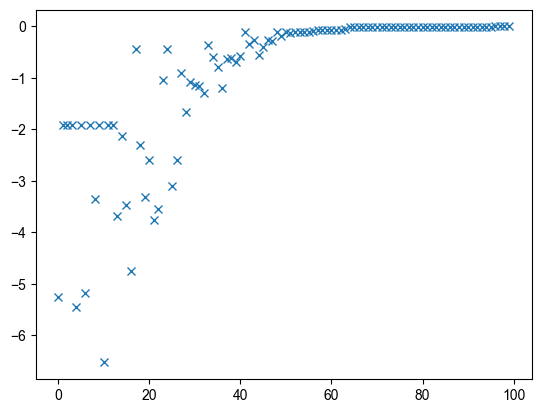

In [256]:
plt.plot(res, 'x')
print(np.max(res))

In [302]:
from scipy.optimize import minimize
import numpy as np

def cosmixture(**kwargs):
    a = kwargs.get('a', 0)
    b = kwargs.get('b', 0)
    c = kwargs.get('c', 0)
    return -(a * np.cos(b) + c)

# Create a function that takes a 1-D array and converts it to **kwargs
def objective_function(params):
    kwargs = {'a': params[0], 'b': params[1], 'c': params[2]}
    return cosmixture(**kwargs)

# Initial guess for parameters as a 1-D array
initial_guess = [1, 1, 1]

# Perform the optimization
result = minimize(objective_function, initial_guess, method='Nelder-Mead')

# Extract the optimized parameters
optimized_params = result.x

In [18]:
import pickle

with open('../surdata/scipy_vs_simanneal.pkl', 'rb') as file: # ../surdata/tree23_iter-10_objective-meanopt10-03-2023_18:04.pkl
    # Load the object from the file
    loaded_data = pickle.load(file)

In [24]:
loaded_data[0][0][1][-1]

[71.86763978750275,
 42.580355501571766,
 54.41926217369501,
 15.838702433143798,
 12.928220368330127,
 1.14104508600452]

In [3]:
Simulation()

a
b


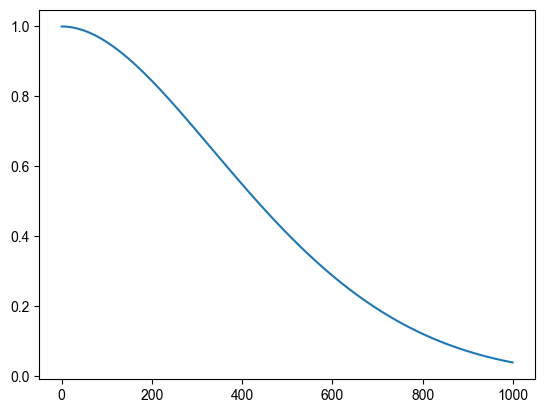

In [89]:
plt.plot([(1-np.log(1+x)**2)**5 for x in np.linspace(0,1,1000)])

In [171]:
a = {'1':2}

In [172]:
b = a.copy()
b['t'] = 5

In [173]:
a

{'1': 2}